In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("mushrooms.csv")
print(df)

     class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0        p         x           s         n       t    p               f   
1        e         x           s         y       t    a               f   
2        e         b           s         w       t    l               f   
3        p         x           y         w       t    p               f   
4        e         x           s         g       f    n               f   
...    ...       ...         ...       ...     ...  ...             ...   
8119     e         k           s         n       f    n               a   
8120     e         x           s         n       f    n               a   
8121     e         f           s         n       f    n               a   
8122     p         k           y         n       f    y               f   
8123     e         x           s         n       f    n               a   

     gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0               c         n

In [3]:
df.shape

(8124, 23)

In [4]:
type(df)

pandas.core.frame.DataFrame

In [5]:
df.value_counts('class')

class
e    4208
p    3916
dtype: int64

In [6]:
x=df

In [7]:
from sklearn.preprocessing import LabelEncoder

l=LabelEncoder()
x['cap-shape']=l.fit_transform(x['cap-shape'])
x['cap-color']=l.fit_transform(x['cap-color'])
x['bruises']=l.fit_transform(x['bruises'])
x['odor']=l.fit_transform(x['odor'])
x['gill-attachment']=l.fit_transform(x['gill-attachment'])
x['gill-size']=l.fit_transform(x['gill-size'])
x['gill-color']=l.fit_transform(x['gill-color'])
x['stalk-shape']=l.fit_transform(x['stalk-shape'])
x['population']=l.fit_transform(x['population'])
x['veil-color']=l.fit_transform(x['veil-color'])
x['ring-type']=l.fit_transform(x['ring-type'])
x['spore-print-color']=l.fit_transform(x['spore-print-color'])
x['habitat']=l.fit_transform(x['habitat'])
x['class']=l.fit_transform(x['class'])
x['stalk-color-below-ring']=l.fit_transform(x['stalk-color-below-ring'])
x['cap-surface']=l.fit_transform(x['cap-surface'])
x['stalk-surface-below-ring']=l.fit_transform(x['stalk-surface-below-ring'])
x['stalk-surface-above-ring']=l.fit_transform(x['stalk-surface-above-ring'])
x['gill-spacing']=l.fit_transform(x['gill-spacing'])



In [8]:
y=df["class"]
print(y)

0       1
1       0
2       0
3       1
4       0
       ..
8119    0
8120    0
8121    0
8122    1
8123    0
Name: class, Length: 8124, dtype: int32


In [9]:
df.drop("class",axis=1,inplace=True)
df.drop("stalk-root",axis=1,inplace=True)
df.drop("stalk-color-above-ring",axis=1,inplace=True)
df.drop("ring-number",axis=1,inplace=True)
df.drop("veil-type",axis=1,inplace=True)
x=df
print(df)

      cap-shape  cap-surface  cap-color  bruises  odor  gill-attachment  \
0             5            2          4        1     6                1   
1             5            2          9        1     0                1   
2             0            2          8        1     3                1   
3             5            3          8        1     6                1   
4             5            2          3        0     5                1   
...         ...          ...        ...      ...   ...              ...   
8119          3            2          4        0     5                0   
8120          5            2          4        0     5                0   
8121          2            2          4        0     5                0   
8122          3            3          4        0     8                1   
8123          5            2          4        0     5                0   

      gill-spacing  gill-size  gill-color  stalk-shape  \
0                0          1           4

In [10]:
print(x)

      cap-shape  cap-surface  cap-color  bruises  odor  gill-attachment  \
0             5            2          4        1     6                1   
1             5            2          9        1     0                1   
2             0            2          8        1     3                1   
3             5            3          8        1     6                1   
4             5            2          3        0     5                1   
...         ...          ...        ...      ...   ...              ...   
8119          3            2          4        0     5                0   
8120          5            2          4        0     5                0   
8121          2            2          4        0     5                0   
8122          3            3          4        0     8                1   
8123          5            2          4        0     5                0   

      gill-spacing  gill-size  gill-color  stalk-shape  \
0                0          1           4

In [11]:
x.to_csv("new.csv")

In [12]:
print(y)

0       1
1       0
2       0
3       1
4       0
       ..
8119    0
8120    0
8121    0
8122    1
8123    0
Name: class, Length: 8124, dtype: int32


In [13]:
from sklearn.model_selection import train_test_split

x_tr,x_tes,y_tr,y_tes=train_test_split(x,y,test_size=.30,random_state=0)

In [14]:
from sklearn.naive_bayes import GaussianNB

In [15]:
c=GaussianNB()
c.fit(x_tr,y_tr)


GaussianNB()

In [16]:
y_pr=c.predict(x_tes)
print(y_pr)

[1 0 0 ... 1 1 1]


In [17]:
tr_score=c.score(x_tes,y_tes)
print(tr_score)
tes_score=c.score(x_tes,y_tes)
print(tes_score)

0.9294503691550451
0.9294503691550451


In [18]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_tes,y_pr,labels=c.classes_)
print(cm)

[[1199   73]
 [  99 1067]]


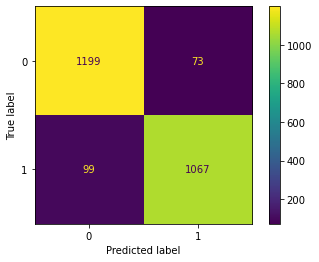

In [19]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=c.classes_)
disp.plot()

In [21]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
print('Accuracy score: {}'.format(accuracy_score(y_tes,y_pr)))
print('Precision score: {}'.format(precision_score(y_tes,y_pr,pos_label=0)))
print('Recall score: {}'.format(recall_score(y_tes,y_pr,pos_label=0)))
print('F1 score: {}'.format(f1_score(y_tes,y_pr,pos_label=0)))

Accuracy score: 0.9294503691550451
Precision score: 0.923728813559322
Recall score: 0.9426100628930818
F1 score: 0.9330739299610895
